<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/%08BP_hv3_4(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [1]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
TensorFlow version :  2.8.2
Keras version :  2.8.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import numpy as np
from scipy import io

# 데이터 파일 불러z오기
train_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/train_shuffled_raw_v3.mat')
test_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [4]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [5]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [6]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [7]:
total_me = 0
total_std = 0

In [8]:
#parameter

batch_size = 1024
epochs = 500
lrate = 0.001

# SBP

## 1

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [10]:
model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2048      
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 16)                0

In [11]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 9s 17ms/step - loss: 12178.6387 - val_loss: 12160.1768
Epoch 2/500
165/165 [==============================] - 2s 14ms/step - loss: 11573.2607 - val_loss: 11322.2969
Epoch 3/500
165/165 [==============================] - 2s 14ms/step - loss: 10785.9531 - val_loss: 10461.8643
Epoch 4/500
165/165 [==============================] - 2s 14ms/step - loss: 9769.1943 - val_loss: 9538.6982
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 8492.3584 - val_loss: 8457.3418
Epoch 6/500
165/165 [==============================] - 2s 14ms/step - loss: 7082.6304 - val_loss: 5991.2695
Epoch 7/500
165/165 [==============================] - 2s 14ms/step - loss: 5659.0703 - val_loss: 5756.7031
Epoch 8/500
165/165 [==============================] - 2s 14ms/step - loss: 4255.3389 - val_loss: 3380.8411
Epoch 9/500
165/165 [==============================] - 2s 14ms/step - loss: 3009.5027 - val_loss: 2400.4214
Epoch 10/500
165/165 [

In [12]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  3.3751082650001716 
MAE:  7.68418116967053 
SD:  9.568349331674897


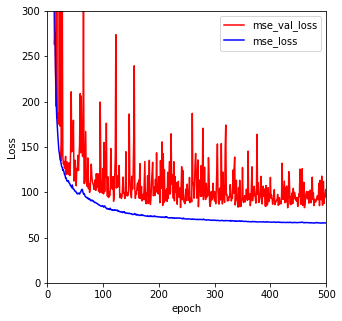

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [15]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                2048      
                                                                 
 batch_normalization_18 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_19 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 16)               

In [16]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 6s 18ms/step - loss: 12238.3486 - val_loss: 12329.6973
Epoch 2/500
165/165 [==============================] - 3s 18ms/step - loss: 11697.7461 - val_loss: 11494.9160
Epoch 3/500
165/165 [==============================] - 2s 14ms/step - loss: 11038.2188 - val_loss: 10114.5996
Epoch 4/500
165/165 [==============================] - 2s 14ms/step - loss: 10216.0264 - val_loss: 8844.8975
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 9218.4346 - val_loss: 9107.9639
Epoch 6/500
165/165 [==============================] - 2s 13ms/step - loss: 8034.7896 - val_loss: 7076.0381
Epoch 7/500
165/165 [==============================] - 2s 14ms/step - loss: 6708.5781 - val_loss: 6605.3843
Epoch 8/500
165/165 [==============================] - 2s 14ms/step - loss: 5330.4014 - val_loss: 3960.4614
Epoch 9/500
165/165 [==============================] - 2s 14ms/step - loss: 4032.5735 - val_loss: 2891.9138
Epoch 10/500
165/165 

In [17]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -3.4753961791537753 
MAE:  8.541459688976037 
SD:  10.468492311648584


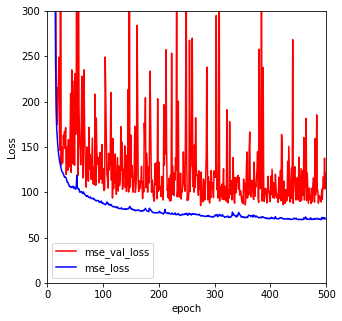

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [20]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                2048      
                                                                 
 batch_normalization_36 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_37 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_37 (Activation)  (None, 16)               

In [21]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 7s 17ms/step - loss: 12344.4258 - val_loss: 12162.0869
Epoch 2/500
165/165 [==============================] - 2s 14ms/step - loss: 11814.8730 - val_loss: 11005.1025
Epoch 3/500
165/165 [==============================] - 2s 14ms/step - loss: 11062.7012 - val_loss: 10871.1865
Epoch 4/500
165/165 [==============================] - 2s 14ms/step - loss: 10059.2334 - val_loss: 8687.6113
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 8857.3018 - val_loss: 6962.5786
Epoch 6/500
165/165 [==============================] - 2s 14ms/step - loss: 7437.9331 - val_loss: 6527.2271
Epoch 7/500
165/165 [==============================] - 2s 14ms/step - loss: 5987.2163 - val_loss: 5344.7451
Epoch 8/500
165/165 [==============================] - 2s 14ms/step - loss: 4588.3120 - val_loss: 3030.0293
Epoch 9/500
165/165 [==============================] - 2s 14ms/step - loss: 3291.0647 - val_loss: 2864.1897
Epoch 10/500
165/165 

In [22]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  5.136648249296966 
MAE:  8.634299563686909 
SD:  9.618887669581797


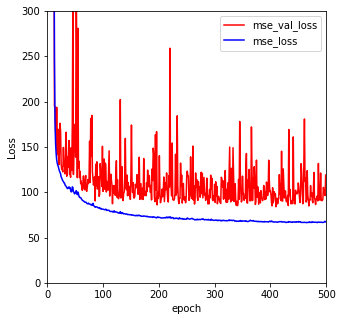

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [24]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  1.6787867783811208 
Ensemble_std:  9.88524310430176



# DBP

In [25]:
total_me = 0
total_std = 0

## 1

In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [27]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                2048      
                                                                 
 batch_normalization_54 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_54 (Activation)  (None, 16)                0         
                                                                 
 dense_58 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_55 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_55 (Activation)  (None, 16)               

In [28]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 6s 16ms/step - loss: 3608.6221 - val_loss: 3654.9148
Epoch 2/500
165/165 [==============================] - 2s 13ms/step - loss: 3297.1235 - val_loss: 3322.2366
Epoch 3/500
165/165 [==============================] - 2s 13ms/step - loss: 2928.6235 - val_loss: 2920.9031
Epoch 4/500
165/165 [==============================] - 2s 13ms/step - loss: 2491.2927 - val_loss: 1889.1738
Epoch 5/500
165/165 [==============================] - 2s 13ms/step - loss: 2013.9375 - val_loss: 1838.8931
Epoch 6/500
165/165 [==============================] - 2s 13ms/step - loss: 1486.2534 - val_loss: 1243.7683
Epoch 7/500
165/165 [==============================] - 2s 13ms/step - loss: 985.1749 - val_loss: 1113.2753
Epoch 8/500
165/165 [==============================] - 2s 13ms/step - loss: 576.2352 - val_loss: 326.7744
Epoch 9/500
165/165 [==============================] - 2s 13ms/step - loss: 291.7562 - val_loss: 312.8002
Epoch 10/500
165/165 [===========

In [29]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -2.4506905544539084 
MAE:  4.8753850346998435 
SD:  5.839240810608221


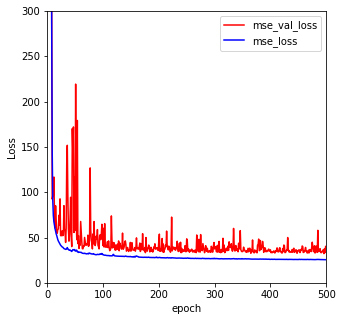

In [30]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [31]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [32]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 16)                2048      
                                                                 
 batch_normalization_72 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_72 (Activation)  (None, 16)                0         
                                                                 
 dense_77 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_73 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_73 (Activation)  (None, 16)               

In [33]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 6s 16ms/step - loss: 3697.4460 - val_loss: 3626.2756
Epoch 2/500
165/165 [==============================] - 2s 14ms/step - loss: 3387.0952 - val_loss: 3134.8298
Epoch 3/500
165/165 [==============================] - 2s 14ms/step - loss: 2978.1912 - val_loss: 2986.8103
Epoch 4/500
165/165 [==============================] - 2s 14ms/step - loss: 2465.2432 - val_loss: 1981.8564
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 1921.0779 - val_loss: 1747.3428
Epoch 6/500
165/165 [==============================] - 2s 14ms/step - loss: 1406.8579 - val_loss: 1051.1132
Epoch 7/500
165/165 [==============================] - 2s 13ms/step - loss: 952.3029 - val_loss: 1127.2231
Epoch 8/500
165/165 [==============================] - 2s 14ms/step - loss: 590.8055 - val_loss: 846.3639
Epoch 9/500
165/165 [==============================] - 2s 14ms/step - loss: 328.7301 - val_loss: 275.6851
Epoch 10/500
165/165 [===========

In [34]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.43855370924907 
MAE:  4.385152255644523 
SD:  6.0288844871804175


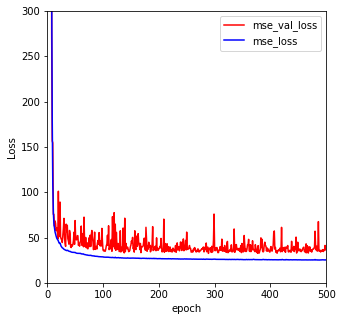

In [35]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [36]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [37]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 16)                2048      
                                                                 
 batch_normalization_90 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_90 (Activation)  (None, 16)                0         
                                                                 
 dense_96 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_91 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_91 (Activation)  (None, 16)               

In [38]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 7s 16ms/step - loss: 3679.4453 - val_loss: 3672.7612
Epoch 2/500
165/165 [==============================] - 2s 14ms/step - loss: 3425.2666 - val_loss: 3342.4019
Epoch 3/500
165/165 [==============================] - 2s 14ms/step - loss: 3103.8381 - val_loss: 2906.6787
Epoch 4/500
165/165 [==============================] - 2s 14ms/step - loss: 2673.6377 - val_loss: 2384.8909
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 2198.5994 - val_loss: 1820.3704
Epoch 6/500
165/165 [==============================] - 2s 14ms/step - loss: 1725.2008 - val_loss: 1476.8008
Epoch 7/500
165/165 [==============================] - 2s 14ms/step - loss: 1290.6448 - val_loss: 909.2725
Epoch 8/500
165/165 [==============================] - 2s 14ms/step - loss: 905.1046 - val_loss: 724.0925
Epoch 9/500
165/165 [==============================] - 2s 14ms/step - loss: 593.7485 - val_loss: 468.0482
Epoch 10/500
165/165 [===========

In [39]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.4655046213017098 
MAE:  4.441584292026395 
SD:  5.797587197970584


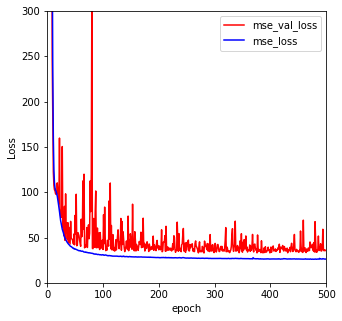

In [40]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [41]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -1.1592138221688495 
Ensemble_std:  5.888570831919741
